In [48]:
!pip install pyspark

In [49]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Fire DF').getOrCreate()

In [50]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [51]:
df = spark.read.csv("sf-fire-calls.csv",header=True,inferSchema=True)
df.show()
df.printSchema()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+

In [52]:
df1 = df.select("CallType","CallDate","City","Zipcode","Neighborhood","Delay")
df1.show()

+----------------+----------+----+-------+--------------------+---------+
|        CallType|  CallDate|City|Zipcode|        Neighborhood|    Delay|
+----------------+----------+----+-------+--------------------+---------+
|  Structure Fire|01/11/2002|  SF|  94109|     Pacific Heights|     2.95|
|Medical Incident|01/11/2002|  SF|  94124|Bayview Hunters P...|      4.7|
|Medical Incident|01/11/2002|  SF|  94102|          Tenderloin|2.4333334|
|    Vehicle Fire|01/11/2002|  SF|  94110|      Bernal Heights|      1.5|
|          Alarms|01/11/2002|  SF|  94109|    Western Addition|3.4833333|
|  Structure Fire|01/11/2002|  SF|  94105|Financial Distric...|     1.75|
|          Alarms|01/11/2002|  SF|  94112|Oceanview/Merced/...|2.7166667|
|          Alarms|01/11/2002|  SF|  94102|          Tenderloin|1.7833333|
|Medical Incident|01/11/2002|  SF|  94115|           Japantown|1.5166667|
|Medical Incident|01/11/2002|  SF|  94114| Castro/Upper Market|2.7666667|
|Medical Incident|01/11/2002|  SF|  94

In [53]:
df1.withColumn("Date",to_date(col("CallDate"),"dd/MM/yyyy")).show()

+----------------+----------+----+-------+--------------------+---------+----------+
|        CallType|  CallDate|City|Zipcode|        Neighborhood|    Delay|      Date|
+----------------+----------+----+-------+--------------------+---------+----------+
|  Structure Fire|01/11/2002|  SF|  94109|     Pacific Heights|     2.95|2002-11-01|
|Medical Incident|01/11/2002|  SF|  94124|Bayview Hunters P...|      4.7|2002-11-01|
|Medical Incident|01/11/2002|  SF|  94102|          Tenderloin|2.4333334|2002-11-01|
|    Vehicle Fire|01/11/2002|  SF|  94110|      Bernal Heights|      1.5|2002-11-01|
|          Alarms|01/11/2002|  SF|  94109|    Western Addition|3.4833333|2002-11-01|
|  Structure Fire|01/11/2002|  SF|  94105|Financial Distric...|     1.75|2002-11-01|
|          Alarms|01/11/2002|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-11-01|
|          Alarms|01/11/2002|  SF|  94102|          Tenderloin|1.7833333|2002-11-01|
|Medical Incident|01/11/2002|  SF|  94115|           Japantown|1.

In [54]:
df2 = df1.withColumn("Date",to_date(col("CallDate"),"MM/dd/yyyy")).drop("CallDate")
df2.show()

+----------------+----+-------+--------------------+---------+----------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|
+----------------+----+-------+--------------------+---------+----------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|
|          Alarms|  SF|  94102|          Tenderloin|1.7833333|2002-01-11|
|Medical Incident|  SF|  94115|           Japantown|1.5166667|2002-01-11|
|Medical Incident|  SF|  94114| Castro/Upper Market|2.7666667|2002-01-11|
|Medical Incident|  SF|  94110|       

In [55]:
df3 = df2.withColumn("Year",year(col("Date")))\
         .withColumn("Month",month(col("Date")))\
         .withColumn("Week",weekofyear(col("Date")))

df3.show()

+----------------+----+-------+--------------------+---------+----------+----+-----+----+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|
+----------------+----+-------+--------------------+---------+----------+----+-----+----+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94102|          Tenderloin|1.7833333|2002-01-11|2002|    1|   2|
|Medical I

In [56]:
# Create a user defined function(UDF)

def mapSeason(data):
  if 2 < data < 6:
    return "Spring"
  elif 5 < data < 9:
    return "Summer"
  elif 8 < data < 12:
    return "Autumn"
  else:
    return "Winter"

seasonUDF = udf(mapSeason,StringType())
clean_udf = df3.withColumn("Season",seasonUDF(col("Month")))
clean_udf.show()


+----------------+----+-------+--------------------+---------+----------+----+-----+----+------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|Season|
+----------------+----+-------+--------------------+---------+----------+----+-----+----+------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2|Winter|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2|Winter|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2|Winter|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2|Winter|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94102

In [57]:
clean_udf.select("CallType","Date","City","Month","Season")\
         .where(col("Season")=="Spring").show()

+----------------+----------+----+-----+------+
|        CallType|      Date|City|Month|Season|
+----------------+----------+----+-----+------+
|Medical Incident|2002-03-01|  SF|    3|Spring|
|           Other|2002-03-01|  SF|    3|Spring|
|          Alarms|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|           Other|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|  Structure Fire|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|  Structure Fire|2002-03-01|  SF|    3|Spring|
|  Structure Fire|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|Spring|
|Medical Incident|2002-03-01|  SF|    3|

In [58]:
#QUESTION 1
clean_udf.select("Year").groupBy("Year").count().orderBy("Year",ascending=True).show()

+----+-----+
|Year|count|
+----+-----+
|2000| 5459|
|2001| 7713|
|2002| 8090|
|2003| 8499|
|2004| 8283|
|2005| 8282|
|2006| 8174|
|2007| 8255|
|2008| 8869|
|2009| 8789|
|2010| 9341|
|2011| 9735|
|2012| 9674|
|2013|10020|
|2014|10775|
|2015|11458|
|2016|11609|
|2017|12135|
|2018|10136|
+----+-----+



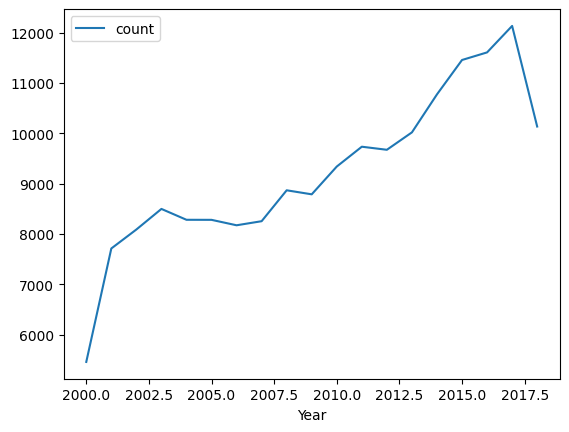

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
pandas_udf=clean_udf.select("Year")\
.groupBy("Year").count()\
.orderBy("Year",ascending=True).toPandas()
pandas_udf.plot.line(x="Year",y="count")
plt.show()

In [65]:
#QUESTION 2
clean_udf.select("CallType","Year")\
         .where(col("Year")==2018).distinct().show(truncate=False)


+-------------------------------+----+
|CallType                       |Year|
+-------------------------------+----+
|Electrical Hazard              |2018|
|Fuel Spill                     |2018|
|Water Rescue                   |2018|
|Medical Incident               |2018|
|Vehicle Fire                   |2018|
|Other                          |2018|
|HazMat                         |2018|
|Gas Leak (Natural and LP Gases)|2018|
|Assist Police                  |2018|
|Smoke Investigation (Outside)  |2018|
|Elevator / Escalator Rescue    |2018|
|Odor (Strange / Unknown)       |2018|
|Structure Fire                 |2018|
|Alarms                         |2018|
|Traffic Collision              |2018|
|Citizen Assist / Service Call  |2018|
|Train / Rail Incident          |2018|
|Outside Fire                   |2018|
|Suspicious Package             |2018|
|Explosion                      |2018|
+-------------------------------+----+



In [66]:
#QUESTION 3
clean_udf.select('Week')\
.where(col('Year')==2018)\
.groupBy('Week')\
.count()\
.orderBy("count",ascending=False).collect()[0][0]

22

In [67]:
#QUESTION 4
clean_udf.select("Month")\
.where(col('Year')==2018)\
.groupBy('Month')\
.count()\
.orderBy("count",asecending=False).collect()[0][0]

11

In [69]:
#QUESTION 5
selected_year = 2018
clean_ud = clean_udf.filter(clean_udf["Year"] == selected_year)
monthly_report = clean_ud.groupBy("Year", "Month", "CallType") \
.agg(count(col("CallType")).alias("call_count"))
monthly_report.show()

+----+-----+--------------------+----------+
|Year|Month|            CallType|call_count|
+----+-----+--------------------+----------+
|2018|    2|   Traffic Collision|        37|
|2018|    2|               Other|         7|
|2018|    1|               Other|         3|
|2018|    1|          Fuel Spill|         1|
|2018|    3|Citizen Assist / ...|         8|
|2018|    2|    Medical Incident|       635|
|2018|    2|Gas Leak (Natural...|         7|
|2018|    2|Odor (Strange / U...|         1|
|2018|    3|        Water Rescue|         4|
|2018|    9|   Traffic Collision|        49|
|2018|   10|      Structure Fire|        98|
|2018|    1|    Medical Incident|       692|
|2018|   11|              Alarms|        24|
|2018|    2|        Vehicle Fire|         1|
|2018|    2|              Alarms|       102|
|2018|    2|       Assist Police|         1|
|2018|   10|Elevator / Escala...|         5|
|2018|   11|   Traffic Collision|         8|
|2018|    1|Train / Rail Inci...|         2|
|2018|    

In [70]:
#QUESTION 6
from pyspark.sql.window import Window
season_count=clean_udf.select("CallType","Season")\
.filter(col('Year')==2014)\
.groupBy('Season','CallType')\
.count()\
.withColumn('rank',dense_rank().over(Window.partitionBy('Season').orderBy(col('count').desc())))\
.orderBy('Season','rank',ascending=[1,1])\
.filter(col('rank')<6)
season_count.show()

+------+--------------------+-----+----+
|Season|            CallType|count|rank|
+------+--------------------+-----+----+
|Autumn|    Medical Incident| 1832|   1|
|Autumn|      Structure Fire|  319|   2|
|Autumn|              Alarms|  314|   3|
|Autumn|   Traffic Collision|  120|   4|
|Autumn|Citizen Assist / ...|   26|   5|
|Spring|    Medical Incident| 1801|   1|
|Spring|      Structure Fire|  314|   2|
|Spring|              Alarms|  281|   3|
|Spring|   Traffic Collision|  112|   4|
|Spring|Citizen Assist / ...|   36|   5|
|Summer|    Medical Incident| 1770|   1|
|Summer|      Structure Fire|  322|   2|
|Summer|              Alarms|  269|   3|
|Summer|   Traffic Collision|  112|   4|
|Summer|        Outside Fire|   37|   5|
|Winter|    Medical Incident| 1773|   1|
|Winter|              Alarms|  337|   2|
|Winter|      Structure Fire|  310|   3|
|Winter|   Traffic Collision|  111|   4|
|Winter|Citizen Assist / ...|   36|   5|
+------+--------------------+-----+----+



In [73]:
#QUESTION 7
fire_calls = clean_udf.filter(clean_udf["CallType"] == "Structure Fire")
monthly_counts = fire_calls.groupBy(date_format("Date", "yyyy-MM").alias("Month")).count()
monthly_counts.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2013-05|  110|
|2009-07|   89|
|2018-10|   98|
|2002-11|  134|
|2013-09|   98|
|2009-01|   91|
|2005-07|   92|
|2005-09|  101|
|2013-12|  123|
|2006-07|   91|
|2003-02|  142|
|2013-06|   92|
|2005-12|  112|
|2006-05|   98|
|2008-09|   86|
|2006-04|   86|
|2006-09|   96|
|2002-04|  121|
|2003-07|  128|
|2002-03|  129|
+-------+-----+
only showing top 20 rows



In [75]:
#QUESTION 8
fire=clean_udf.filter(clean_udf["Year"]==2018)\
.groupBy("Month").count()\
.orderBy('count',ascending=False).show()

+-----+-----+
|Month|count|
+-----+-----+
|   10| 1068|
|    5| 1047|
|    3| 1029|
|    8| 1021|
|    1| 1007|
|    6|  974|
|    7|  974|
|    9|  951|
|    4|  947|
|    2|  919|
|   11|  199|
+-----+-----+



In [79]:
fire=clean_udf.filter(clean_udf["Year"]==2018)\
.groupBy("Month").count()\
.orderBy(col("count").desc()).first()
print("Month that got highest number of fire calls in 2018 is: ",fire)

Month that got highest number of fire calls in 2018 is:  Row(Month=10, count=1068)


In [80]:
#QUESTION 9
fire_calls = clean_udf.filter(clean_udf["CallType"] == "Structure Fire")
year = fire_calls.groupBy(year("Date").alias("Year"), "CallType").count()
major_call_per_year = year.orderBy("Year", desc("count")) \
    .groupBy("Year").agg(first("CallType").alias("MajorCallType"))
major_call_per_year.show()

+----+--------------+
|Year| MajorCallType|
+----+--------------+
|2000|Structure Fire|
|2001|Structure Fire|
|2002|Structure Fire|
|2003|Structure Fire|
|2004|Structure Fire|
|2005|Structure Fire|
|2006|Structure Fire|
|2007|Structure Fire|
|2008|Structure Fire|
|2009|Structure Fire|
|2010|Structure Fire|
|2011|Structure Fire|
|2012|Structure Fire|
|2013|Structure Fire|
|2014|Structure Fire|
|2015|Structure Fire|
|2016|Structure Fire|
|2017|Structure Fire|
|2018|Structure Fire|
+----+--------------+



In [81]:
#QUESTION 10
average_delay = clean_udf.groupBy("CallType").agg(avg("Delay").alias("AverageDelay"))
average_delay.show()

+--------------------+------------------+
|            CallType|      AverageDelay|
+--------------------+------------------+
|Elevator / Escala...| 4.337821933487857|
|         Marine Fire| 6.928571314285715|
|  Aircraft Emergency|3.7731481500000004|
|Confined Space / ...| 6.915384576923078|
|      Administrative|12.261111333333332|
|              Alarms|3.5427290545084076|
|Odor (Strange / U...| 4.947959182000003|
|Citizen Assist / ...| 5.473342576604596|
|              HazMat| 7.527016126612902|
|Watercraft in Dis...| 6.886904817857142|
|           Explosion| 4.110674168539326|
|           Oil Spill| 4.977777761904762|
|        Vehicle Fire|3.9039227134074928|
|  Suspicious Package|6.5766667199999995|
|Extrication / Ent...| 4.391666678571427|
|               Other| 5.505155432421978|
|        Outside Fire| 4.181948425367714|
|   Traffic Collision| 3.789132088873234|
|       Assist Police|26.981903994285716|
|Gas Leak (Natural...|  4.58339877840314|
+--------------------+------------

In [84]:
#QUESTION 11
max_avg_delay = average_delay.orderBy(desc("AverageDelay")).first()
print(max_avg_delay)

Row(CallType='Mutual Aid / Assist Outside Agency', AverageDelay=38.41666631111111)


In [91]:
#QUESTION 14
fire = clean_udf.filter(clean_udf["CallType"] == "Structure Fire")
result = fire.groupBy("Year", "CallType").agg(avg("Delay").alias("AverageDelay"))
maxdelay = result.groupBy("CallType").agg({"AverageDelay": "max"})
maxdelay.show()


+--------------+------------------+
|      CallType| max(AverageDelay)|
+--------------+------------------+
|Structure Fire|6.5111497307256405|
+--------------+------------------+



In [93]:
#QUESTION 15
fire = clean_udf.filter(clean_udf["CallType"] == "Structure Fire")
city= fire.groupBy("Year", "City").count()
window_spec = Window.partitionBy("Year").orderBy(city["count"].desc())
max_city = first(city["City"]).over(window_spec)
result = city.withColumn("Max_Call_City", max_city)
result.select("Year", "Max_Call_City").distinct().show()


+----+-------------+
|Year|Max_Call_City|
+----+-------------+
|2000|           SF|
|2001|           SF|
|2002|           SF|
|2003|           SF|
|2004|           SF|
|2005|           SF|
|2006|           SF|
|2007|           SF|
|2008|           SF|
|2009|           SF|
|2010|           SF|
|2011|           SF|
|2012|           SF|
|2013|           SF|
|2014|San Francisco|
|2015|San Francisco|
|2016|San Francisco|
|2017|San Francisco|
|2018|San Francisco|
+----+-------------+



In [89]:
#QUESTION 16
year_city= clean_udf.groupBy("Year", "City", "CallType") \
    .agg(count("*").alias("CallTypeCount"))
window = Window.partitionBy("Year").orderBy(desc("CallTypeCount"))
cities = year_city.withColumn("rank", rank().over(window))\
.filter(col("rank") <= 5)
cities.show()

+----+----+--------------------+-------------+----+
|Year|City|            CallType|CallTypeCount|rank|
+----+----+--------------------+-------------+----+
|2000|  SF|    Medical Incident|         3399|   1|
|2000|  SF|      Structure Fire|         1002|   2|
|2000|  SF|              Alarms|          620|   3|
|2000|  SF|Citizen Assist / ...|          124|   4|
|2000|  SF|               Other|           99|   5|
|2001|  SF|    Medical Incident|         4619|   1|
|2001|  SF|      Structure Fire|         1542|   2|
|2001|  SF|              Alarms|          868|   3|
|2001|  SF|               Other|          189|   4|
|2001|  SF|Citizen Assist / ...|          122|   5|
|2002|  SF|    Medical Incident|         5022|   1|
|2002|  SF|      Structure Fire|         1571|   2|
|2002|  SF|              Alarms|          827|   3|
|2002|  SF|               Other|          171|   4|
|2002|  SF|Citizen Assist / ...|          140|   5|
|2003|  SF|    Medical Incident|         5026|   1|
|2003|  SF| 